**Importing Libraries**

In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score)

**Loading the Dataset**

In [225]:
df = pd.read_excel("/content/framingham_dataset.xlsx")

In [226]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [227]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [229]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


**Data Cleaning**

In [230]:
df.drop(columns=['education'], inplace=True)  #droping unnecessary columns - education

In [231]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [232]:
df.rename(columns={                             #renaming columns
    'male': 'gender',
    'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigs_per_day',
    'totChol': 'total_cholesterol',
    'sysBP': 'systolic_bp',
    'diaBP': 'diastolic_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'TenYearCHD': 'chd'
}, inplace=True)

In [233]:
print(df.columns)

Index(['gender', 'age', 'current_smoker', 'cigs_per_day', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose', 'chd'],
      dtype='object')


**Handle Missing Values**

In [234]:
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Missing Values Before Cleaning:
 gender                 0
age                    0
current_smoker         0
cigs_per_day          29
BPMeds                53
prevalentStroke        0
prevalentHyp           0
diabetes               0
total_cholesterol     50
systolic_bp            0
diastolic_bp           0
bmi                   19
heart_rate             1
glucose              388
chd                    0
dtype: int64


In [235]:
df.shape

(4240, 15)

In [236]:
df.dropna(inplace=True)           #removing rows with missing values

print("\nDataset Shape After Removing NaNs:", df.shape)


Dataset Shape After Removing NaNs: (3751, 15)


**Performing EDA**

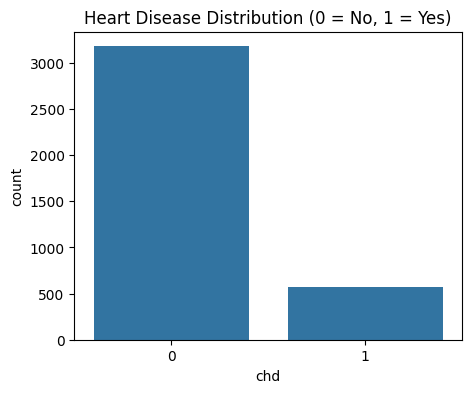

In [237]:
plt.figure(figsize=(5,4))            #Target variable distribution
sns.countplot(x='chd', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

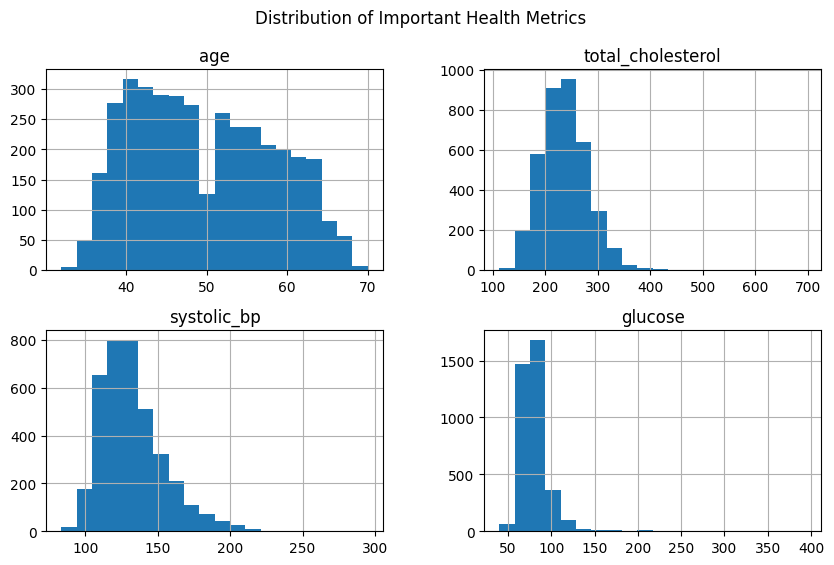

In [238]:
df[['age', 'total_cholesterol', 'systolic_bp', 'glucose']].hist(figsize=(10,6),bins=20)  #key risk factors
plt.suptitle("Distribution of Important Health Metrics")
plt.show()

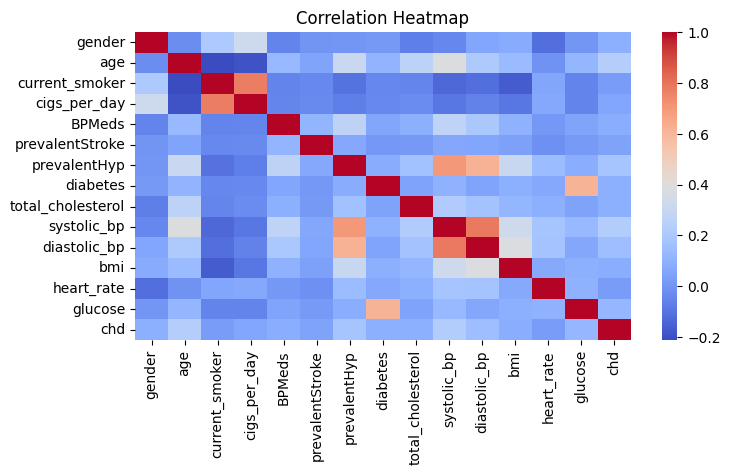

In [239]:
plt.figure(figsize=(8,4))               #Coorelation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

**Outlier Detection**

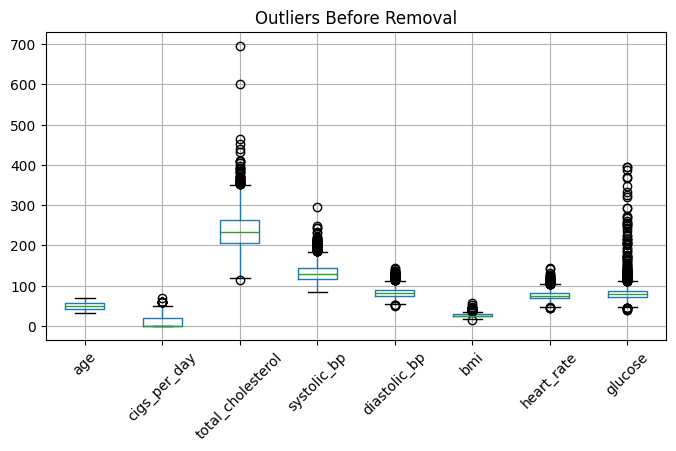

In [240]:
num_cols = [
    'age', 'cigs_per_day', 'total_cholesterol',
    'systolic_bp', 'diastolic_bp', 'bmi',
    'heart_rate', 'glucose']

plt.figure(figsize=(8,4))    # Boxplots before outlier removal
df[num_cols].boxplot()
plt.title("Outliers Before Removal")
plt.xticks(rotation=45)
plt.show()

In [241]:
for col in num_cols:                  #removing outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Dataset Shape After Outlier Removal:", df.shape)

Dataset Shape After Outlier Removal: (3261, 15)


**Feature Selection & Target Variable**

In [242]:
X = df.drop('chd', axis=1)
y = df['chd']

**Feature Scaling using Standardization**

In [243]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train–Test Split**

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=42,stratify=y)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (2282, 14)
Testing Set Size: (979, 14)


**Model Training using Logistic Regresssion**

In [245]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Logistic Regression Model Trained Successfully.")


Logistic Regression Model Trained Successfully.


**Model Evaluation**

In [246]:
y_pred = model.predict(X_test)                  #Using prediction function
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [247]:
accuracy = accuracy_score(y_test, y_pred)       #implementing accuracy score
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 86.41 %


In [248]:
print("\nClassification Report:")               #Classification Report
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       849
           1       0.33      0.02      0.04       130

    accuracy                           0.86       979
   macro avg       0.60      0.51      0.49       979
weighted avg       0.80      0.86      0.81       979



**Confusion Matrix**

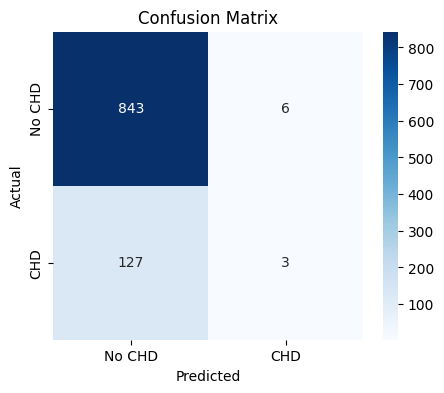

In [249]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['No CHD', 'CHD'],yticklabels=['No CHD', 'CHD'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**ROC Curve & AUC Score**

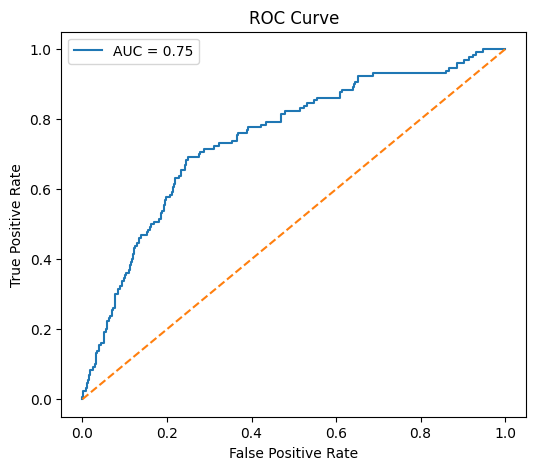

ROC-AUC Score: 0.746


In [250]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", round(roc_auc, 3))

**Predicting the model using user input**

In [251]:
def predict_heart_disease(patient_dict):
    patient_df = pd.DataFrame([patient_dict])
    patient_scaled = scaler.transform(patient_df)
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0][1]

    print("\nHeart Disease Prediction Result :-")
    print("CHD Risk:", "YES" if prediction == 1 else "NO")
    print("Risk Probability:", round(probability * 100, 2), "%")

In [252]:
sample_patient = {
    'gender': 1,
    'age': 54,
    'current_smoker': 1,
    'cigs_per_day': 15,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 1,
    'diabetes': 0,
    'total_cholesterol': 245,
    'systolic_bp': 150,
    'diastolic_bp': 95,
    'bmi': 27.5,
    'heart_rate': 80,
    'glucose': 105
}

In [253]:
predict_heart_disease(sample_patient)


Heart Disease Prediction Result :-
CHD Risk: NO
Risk Probability: 28.07 %


In [254]:
sample_patient_high_risk = {
    'gender': 1,              # 1 = Male
    'age': 62,                # Older age (strong risk factor)
    'current_smoker': 1,      # Smoker
    'cigs_per_day': 30,       # Heavy smoking
    'BPMeds': 1,              # On BP medication
    'prevalentStroke': 0,     # No prior stroke
    'prevalentHyp': 1,        # Has hypertension
    'diabetes': 1,            # Diabetic
    'total_cholesterol': 285, # Very high cholesterol
    'systolic_bp': 170,       # High systolic BP
    'diastolic_bp': 105,      # High diastolic BP
    'bmi': 32.5,              # Obese
    'heart_rate': 95,         # Elevated heart rate
    'glucose': 160            # High glucose
}

In [255]:
predict_heart_disease(sample_patient_high_risk)


Heart Disease Prediction Result :-
CHD Risk: YES
Risk Probability: 51.88 %
